# **AMAZON SALES DATA ANALYSIS**
`-ASTER NATHAN`
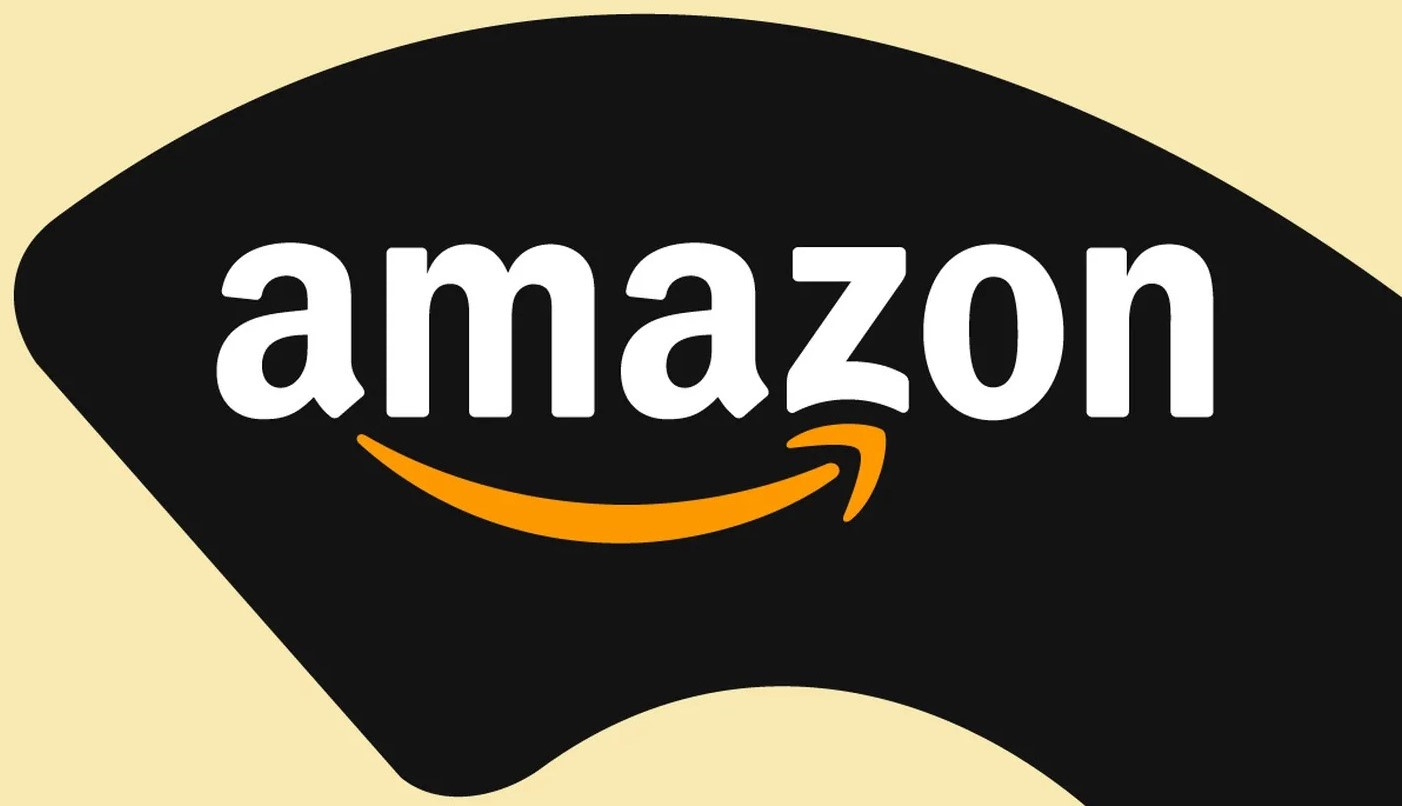
**INTRODUCTION**
- Sales management has gained importance to meet increasing competition and the need for improved methods of distribution to reduce cost and to increase profits.
- Sales management today is the most important function in a commercial and business enterprise.

**OBJECTIVE OF THE PROJECT**
- Amazon Sales Analysis helps us understand the underlying factors behind the Revenue and Profit generation.
- It helps us dive deeper into understanding how certain attributes like Sales Channel, Geographic Locations and Item Types contribute towards the massive growth of Amazon.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/content/Amazon Sales data.csv')

In [3]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
df.shape

(100, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [7]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memor

In [9]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [10]:
df.select_dtypes(include='object').nunique()

Region             7
Country           76
Item Type         12
Sales Channel      2
Order Priority     4
dtype: int64

In [11]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [12]:
df.describe(include='object')

,Region,Country,Item Type,Sales Channel,Order Priority
count,100,100,100,100,100
unique,7,76,12,2,4
top,Sub-Saharan Africa,The Gambia,Clothes,Offline,H
freq,36,4,13,50,30


In [13]:
for col in df.describe(include = 'object'):
  print(col)
  print(df[col].unique())
  print('-'*50)

Region
['Australia and Oceania' 'Central America and the Caribbean' 'Europe'
 'Sub-Saharan Africa' 'Asia' 'Middle East and North Africa'
 'North America']
--------------------------------------------------
Country
['Tuvalu' 'Grenada' 'Russia' 'Sao Tome and Principe' 'Rwanda'
 'Solomon Islands' 'Angola' 'Burkina Faso' 'Republic of the Congo'
 'Senegal' 'Kyrgyzstan' 'Cape Verde' 'Bangladesh' 'Honduras' 'Mongolia'
 'Bulgaria' 'Sri Lanka' 'Cameroon' 'Turkmenistan' 'East Timor' 'Norway'
 'Portugal' 'New Zealand' 'Moldova ' 'France' 'Kiribati' 'Mali'
 'The Gambia' 'Switzerland' 'South Sudan' 'Australia' 'Myanmar' 'Djibouti'
 'Costa Rica' 'Syria' 'Brunei' 'Niger' 'Azerbaijan' 'Slovakia' 'Comoros'
 'Iceland' 'Macedonia' 'Mauritania' 'Albania' 'Lesotho' 'Saudi Arabia'
 'Sierra Leone' "Cote d'Ivoire" 'Fiji' 'Austria' 'United Kingdom'
 'San Marino' 'Libya' 'Haiti' 'Gabon' 'Belize' 'Lithuania' 'Madagascar'
 'Democratic Republic of the Congo' 'Pakistan' 'Mexico'
 'Federated States of Micronesia' 'L

In [14]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [15]:
df['Region'].unique()

array(['Australia and Oceania', 'Central America and the Caribbean',
       'Europe', 'Sub-Saharan Africa', 'Asia',
       'Middle East and North Africa', 'North America'], dtype=object)

In [16]:
df['Item Type'].unique()

array(['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks'], dtype=object)

In [17]:
df['Order Priority'].unique()

array(['H', 'C', 'L', 'M'], dtype=object)

In [18]:
df['Sales Channel'].value_counts()

Offline    50
Online     50
Name: Sales Channel, dtype: int64

## **EDA (EXPLORATORY DATA ANALYSIS)**

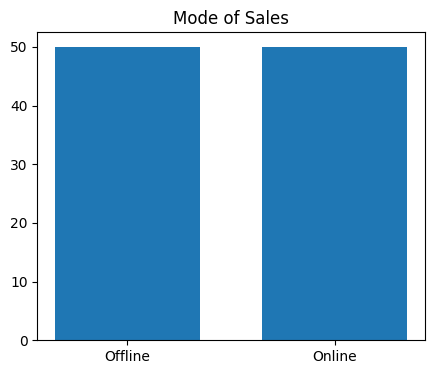

In [19]:
plt.figure(figsize =(5,4))
plt.title('Mode of Sales')
plt.bar(['Offline','Online'],df['Sales Channel'].value_counts(), width = 0.7)
plt.show()

The Above Bar Chart helps us understand the counts of **Online** and **Offline** Transactions and it stands at **50%** each.

In [20]:
df['Item Type'].unique()

array(['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks'], dtype=object)

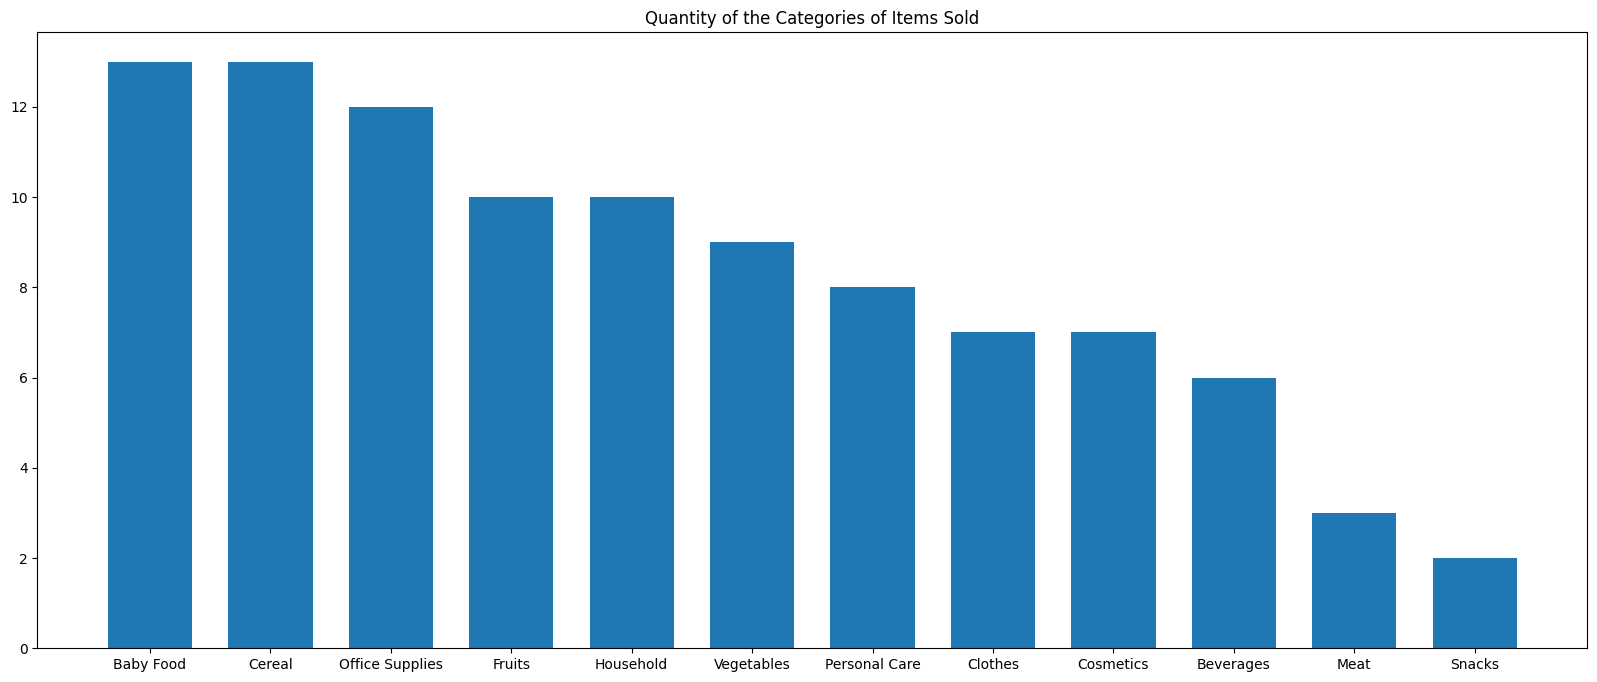

In [41]:
plt.figure(figsize = (20,8))
plt.title('Quantity of the Categories of Items Sold')
plt.bar(['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks'], df['Item Type'].value_counts(),width = 0.7);

**The above Bar Chart gives us an insight on the Value Counts of the Items Sold**

1. **Baby Food** had the most amount of Counts in the dataset.
2. **Cereal** had the second most Counts.
3. **Office Supplies** stood Third.
4. **Fruits** had the fourth most Counts.
5. **Household** stood Fifth.

In [22]:
df['Order Priority'].unique()

array(['H', 'C', 'L', 'M'], dtype=object)

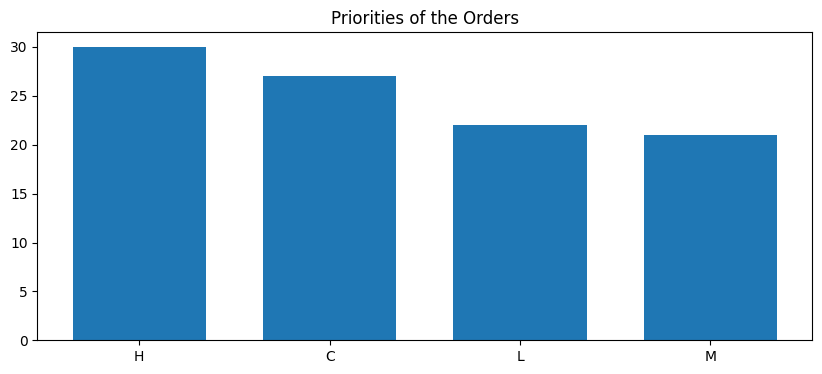

In [23]:
plt.figure(figsize = (10,4))
plt.title('Priorities of the Orders')
plt.bar(['H', 'C', 'L', 'M'],df['Order Priority'].value_counts(),width = 0.7);

**The Bar Chart above gives us the Order Priorities by Value Counts**

1. **H Category** had the most amount of Counts in the dataset.
2. **C Category** had the second most Counts.
3. **L** stood Third.
4. **M Category** had the least value counts.

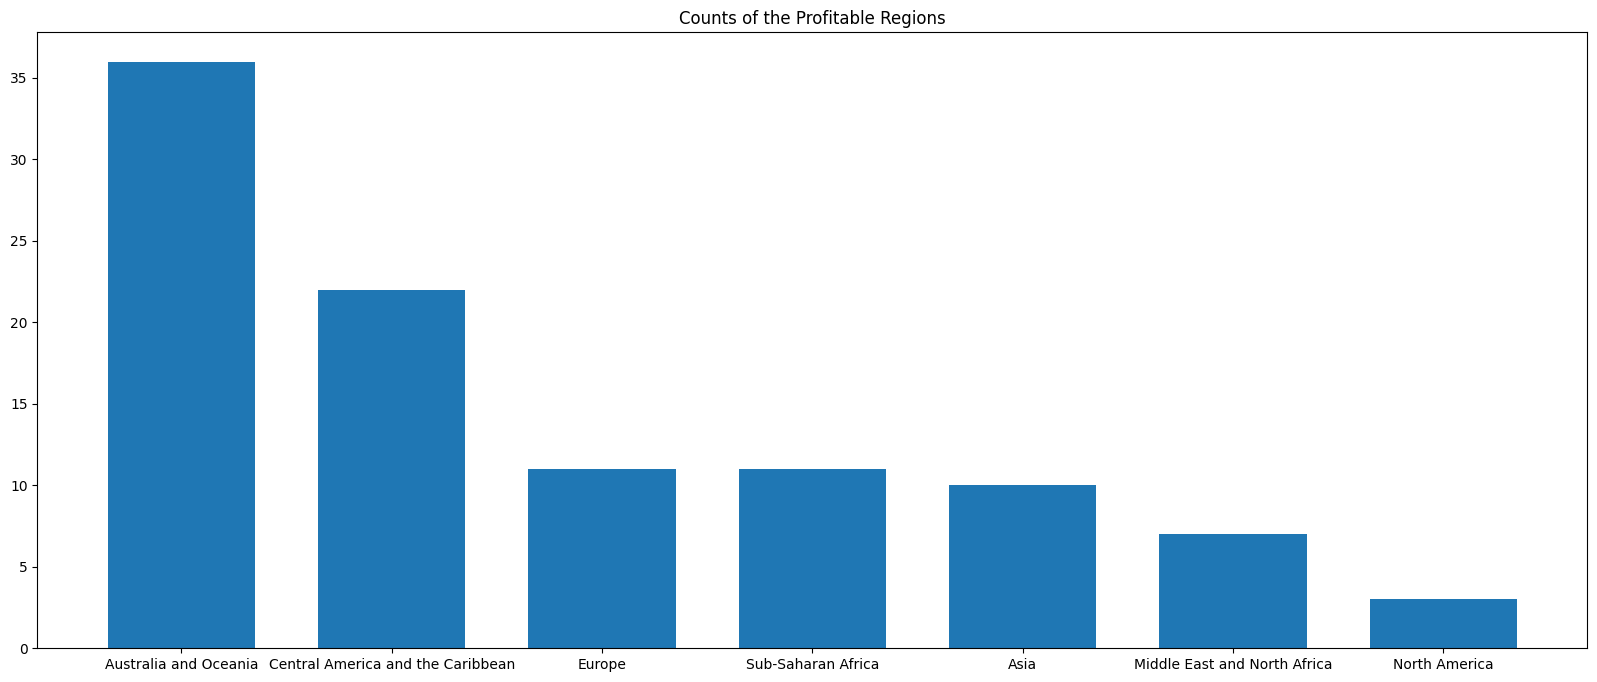

In [24]:
plt.figure(figsize = (20,8))
plt.title('Counts of the Profitable Regions')
plt.bar(['Australia and Oceania', 'Central America and the Caribbean',
       'Europe', 'Sub-Saharan Africa', 'Asia',
       'Middle East and North Africa', 'North America'], df['Region'].value_counts(),width = 0.7);

**The above Bar Chart gives us an insight on the Value Counts of the Geographical Regions**

1. **Australia and Oceania** had the most amount of Counts in the dataset.
2. **Central America and the Caribbean** had the second most Counts.
3. **Europe** stood Third.
4. **Sub-Saharan Africa** had the fouth most Counts.
5. **Asia** stood Fifth.
6. **Middle East and North Africa** had the second least value counts.
7. **North America** had the least value counts.

In [25]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50


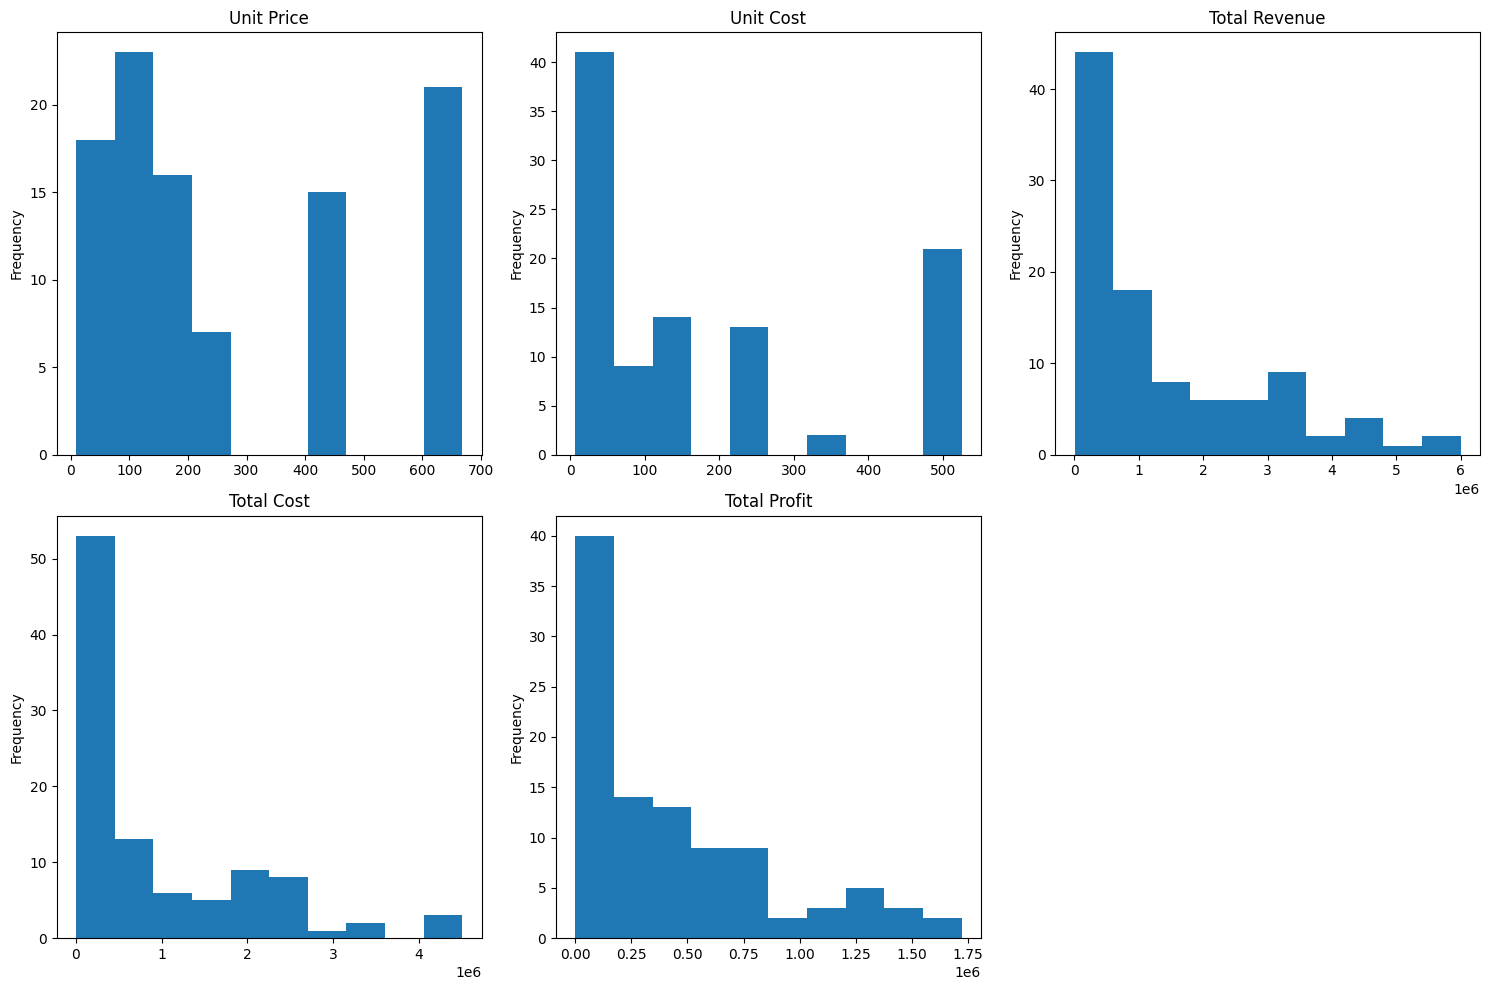

In [26]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include='float').columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

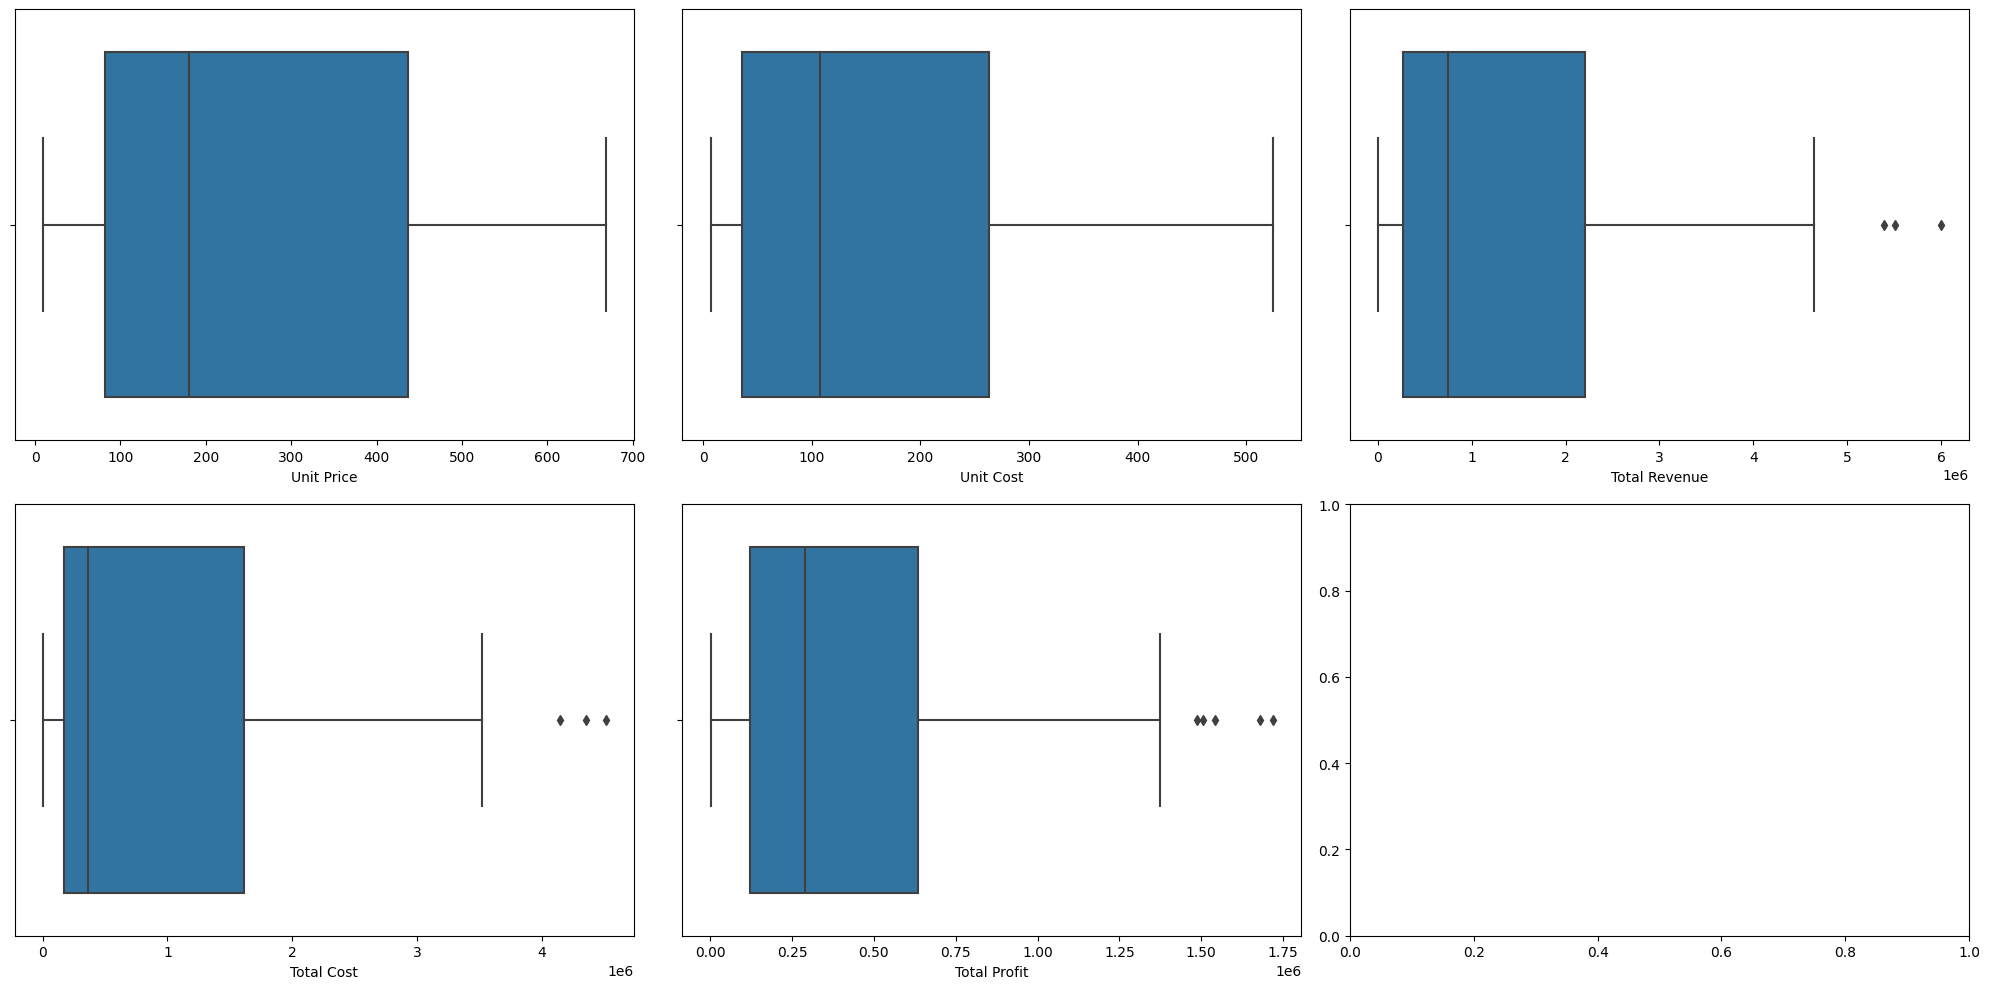

In [27]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

#Show the boxplot
for i, var in enumerate(int_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

# adjust spacing between subplots
fig.tight_layout()

plt.show()

# **CORRELATION MATRIX**

<ipython-input-28-1a28c258056d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


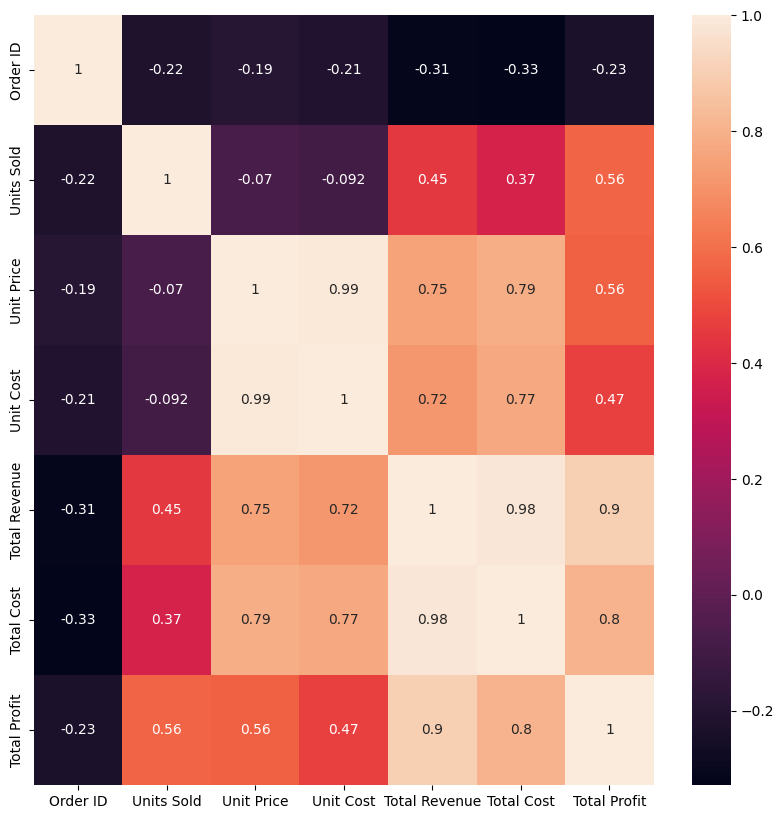

In [28]:
plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

## **DATA ANALYSIS**

# **Analyzing the Revenue based on Attributes**

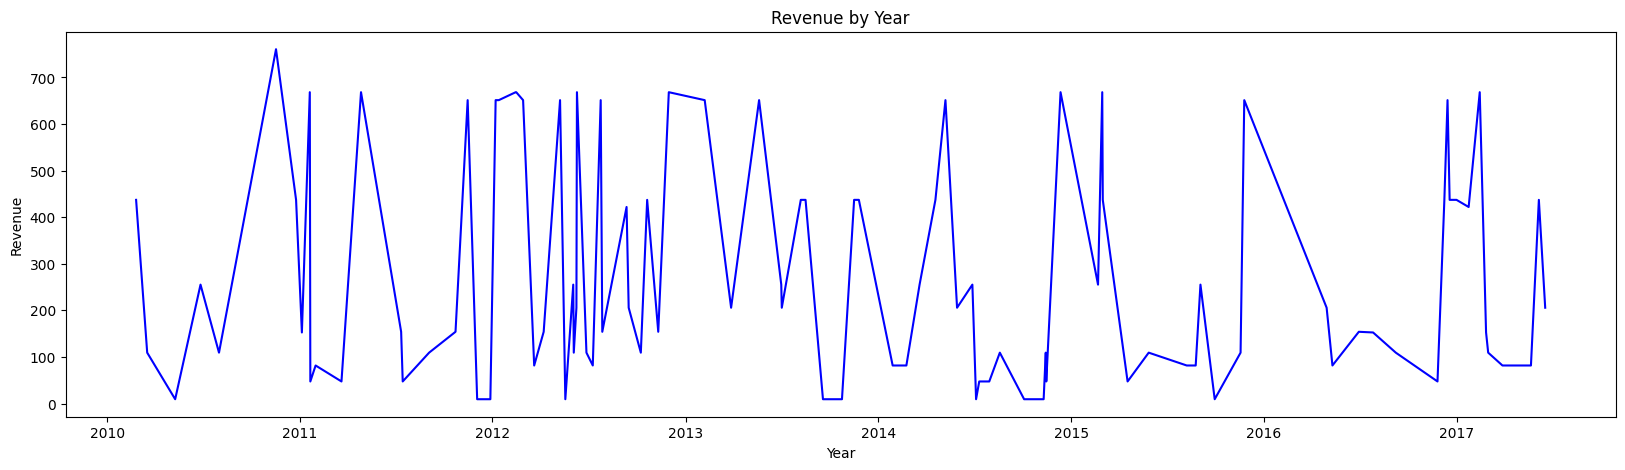

In [39]:
plt.figure(figsize = (20,5))
revenue_by_date = df.groupby('Ship Date')['Unit Price'].sum()
plt.plot(revenue_by_date, color = 'blue')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue by Year')
plt.show()

**The Line Chart provides an insight on Revenue generation accross Years**



*   **2010** generated 450 Million worth of Revenue.
*   **2011** saw the highest peak in terms of Revenue generation.
*   **2012** saw a drastic drop in Revenue.
*   **2013** was way above average in terms of Revenue generation.
*   **2014** generated an average amount of Revenue.
*   **2015** was decent in terms of Revenue generation.
*   **2016** observed a slight upward followed by a downward trend throughout.
*   **2017** was also way above the average Revenue generation.



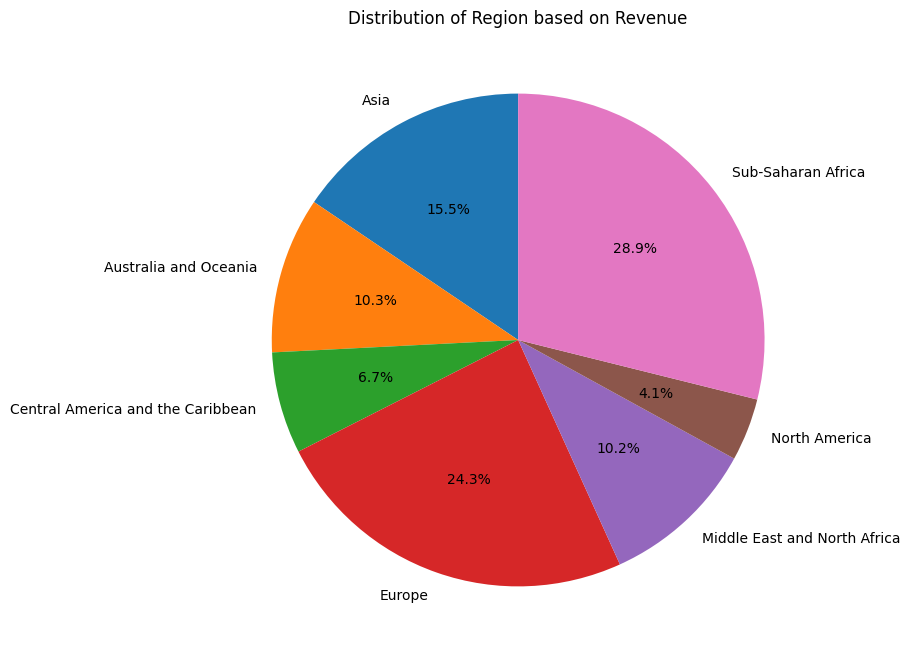

In [30]:
revenue_by_region = df.groupby('Region')['Total Revenue'].sum()
plt.figure(figsize=(20, 8))
plt.pie(revenue_by_region, labels=revenue_by_region.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Region based on Revenue')
plt.show()

**The above Pie chart gives us an insight on the Regions generating Revenue**

1. **Sub-Saharan Africa** generated the most amount of Revenue.
2. **Europe** stood second.
3. **Asia** generated the third most amount of Revenue.
4. **Australia and Oceania** generated the fourth most amount of Revenue.
5. **Middle East and North Africa** generated the fifth most Revenue.
6. **Central America and the Carribean** generated the second least Revenue.
7. **North America** generated the least amount of Revenue.

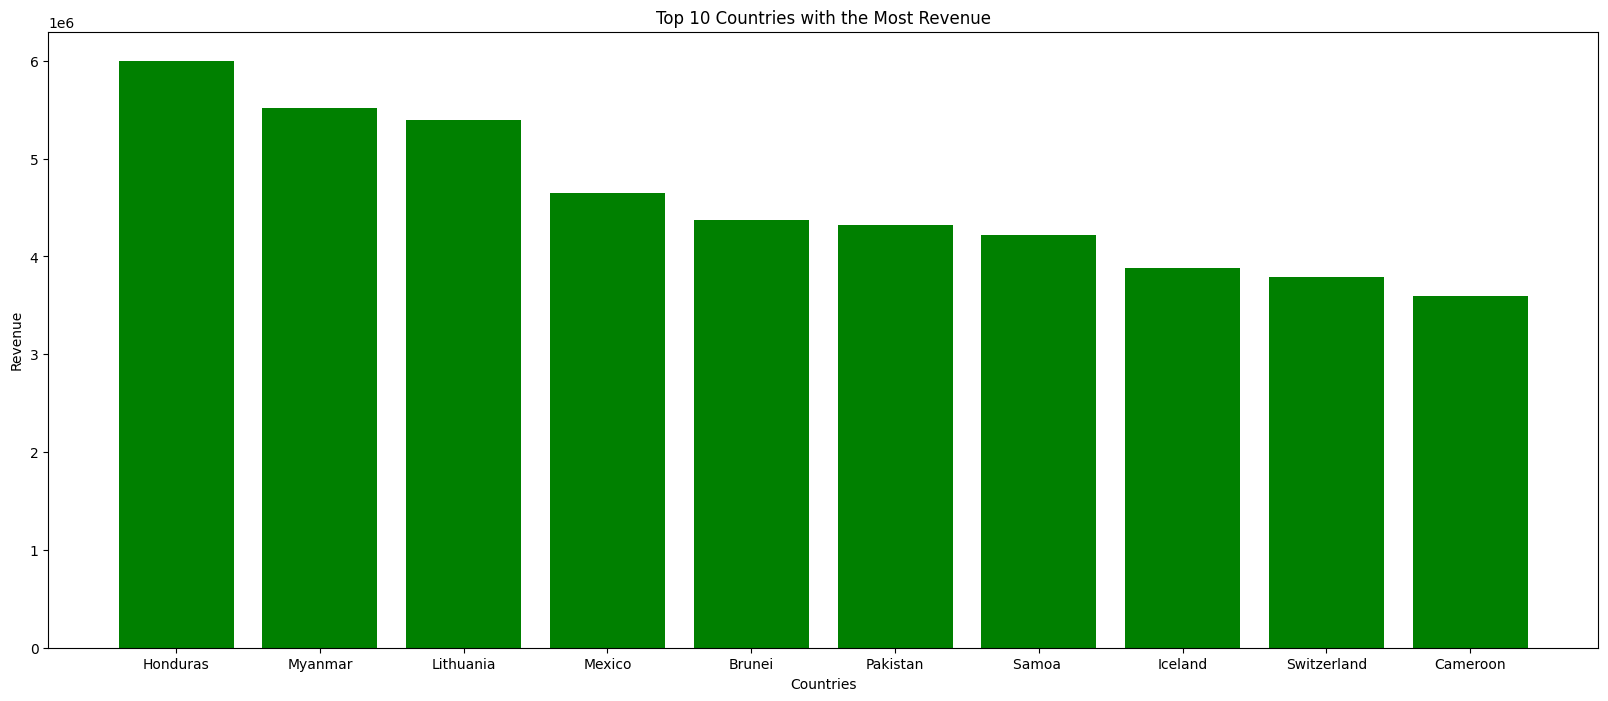

In [31]:
df_sorted = df.sort_values(by='Total Revenue', ascending=False)

top_10_countries = df_sorted.head(10)

plt.figure(figsize=(20, 8))
bars = plt.bar(top_10_countries['Country'], top_10_countries['Total Revenue'], color='green')

plt.xlabel('Countries')
plt.ylabel('Revenue')
plt.title('Top 10 Countries with the Most Revenue')
plt.show()

**The Above Bar Chart gives us an insight on the Most Revenue generated by Countries**

1. **Honduras** generated the most amount of Revenue.
2. **Myanmar** stood second in terms of Revenue generation.
3. **Lithuania** generated the third most Revenue.
4. **Mexico** generated the fourth most Revenue.
5. **Brunei** stood fifth in terms of Revenue generation.

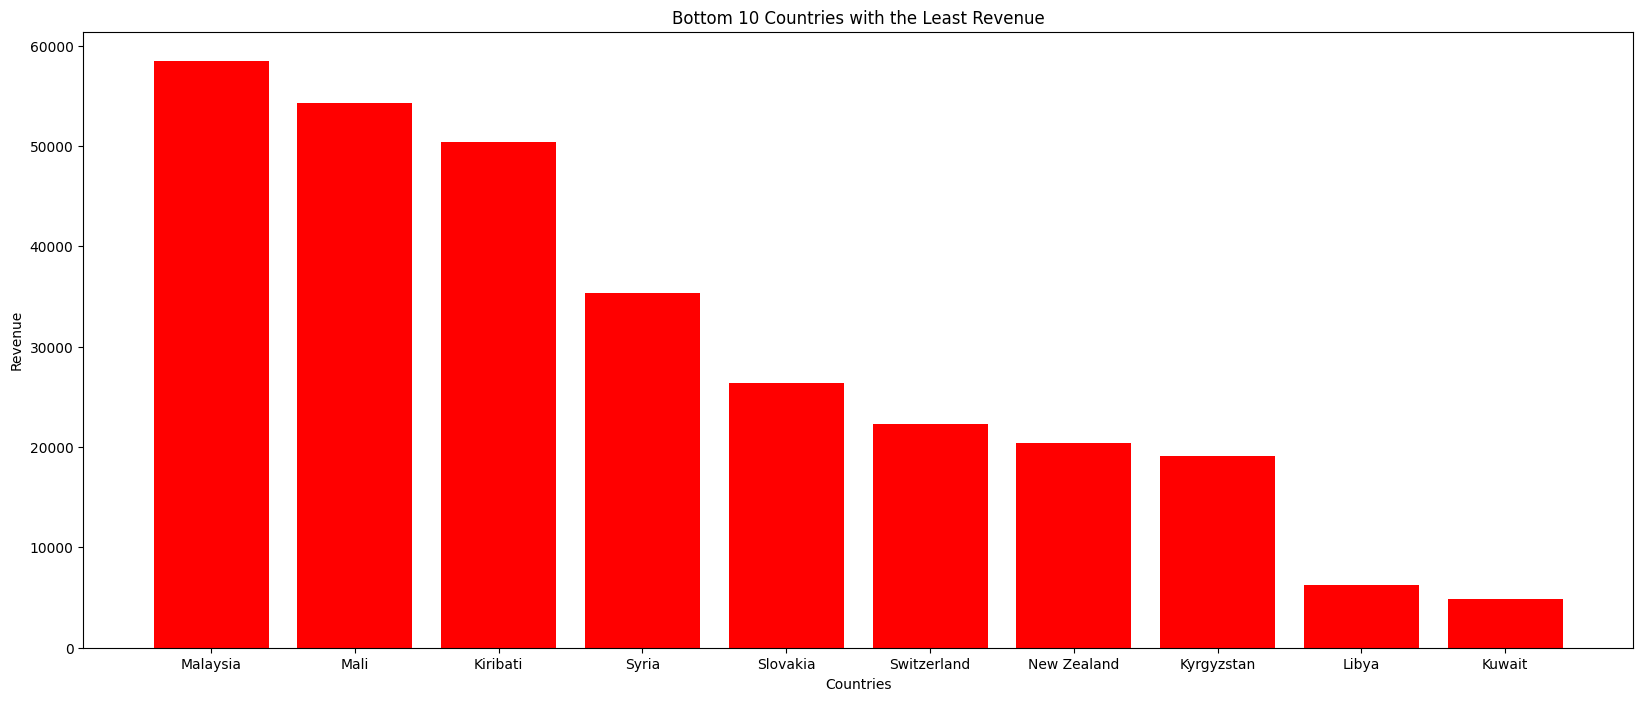

In [32]:
bottom_10_countries = df_sorted.tail(10)

plt.figure(figsize=(20, 8))
bars = plt.bar(bottom_10_countries['Country'], bottom_10_countries['Total Revenue'], color='red')

plt.xlabel('Countries')
plt.ylabel('Revenue')
plt.title('Bottom 10 Countries with the Least Revenue')
plt.show()

**The Bar Chart above gives us an insight on the countries generating the least amount of Revenue**

1. The least amount of Revenue was generated by **Malaysia**.
2. **Mali** stood second in terms of least Revenue generation.
3. **Kiribati** generated the third least amount of Revenue generated.
4. **Syria** stood fourth.
5. **Slovakia** generated the fifth least Revenue.

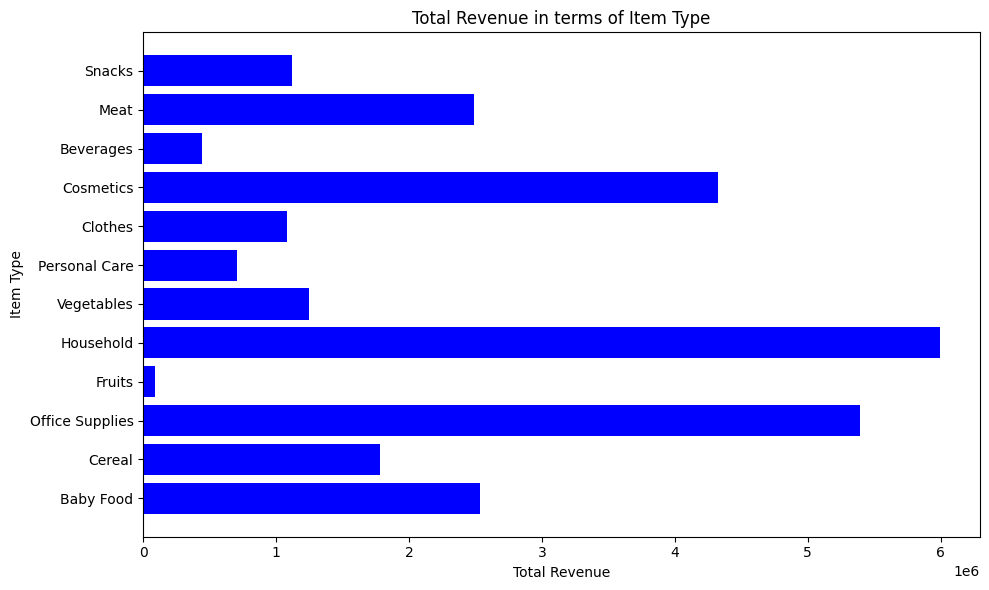

In [33]:
plt.figure(figsize=(10, 6))
plt.barh(df['Item Type'], df['Total Revenue'], color='blue')
plt.xlabel("Total Revenue")
plt.ylabel("Item Type")
plt.title("Total Revenue in terms of Item Type")
plt.tight_layout()
plt.show()

**Total Revenue generated by Item Type**

Top Items generating the most Revenue
1. **Household Items** generated the most amount of Revenue.
2. **Office Supplies** generated the second most amount of Revenue.
3. **Cosmetics** stood third in terms of Revenue generation.

Items generating the least amount of Revenue
1. **Fruits** generated the least amount of Revenue
2. **Beverages** generated the second least amount of Revenue.
3. **Personal Care Apparels** stood third with the least amount of Revenue generated.

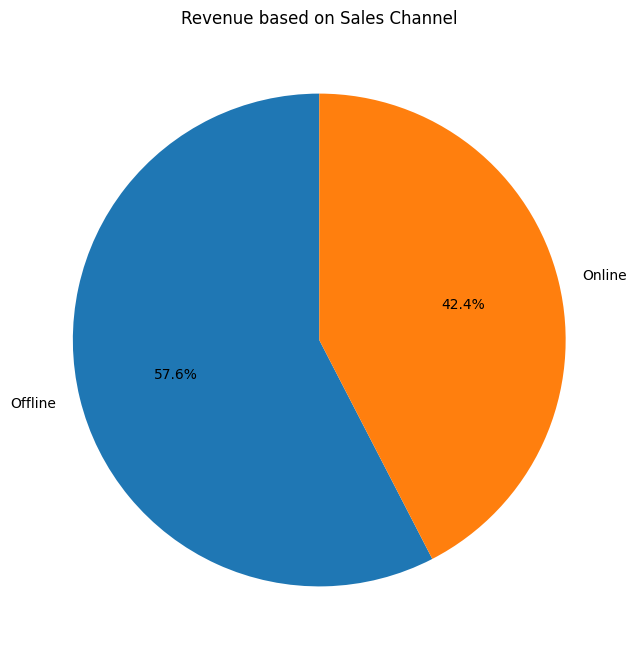

In [34]:
channel_revenue = df.groupby('Sales Channel')['Total Revenue'].sum()
plt.figure(figsize=(10, 8))
plt.pie(channel_revenue, labels=channel_revenue.index, autopct='%1.1f%%', startangle=90)
plt.title('Revenue based on Sales Channel')
plt.show()

**The Pie Chart above gives us an insight on the Sales Channel generating the most amount of Revenue**

The **Offline Sales Channel** generated the most amount of Revenue with 57.6%.

The **Online Sales Channel** generated 42.4% of Revenue.

## **ANALYZING THE PROFIT OF SEVERAL ATTRIBUTES**

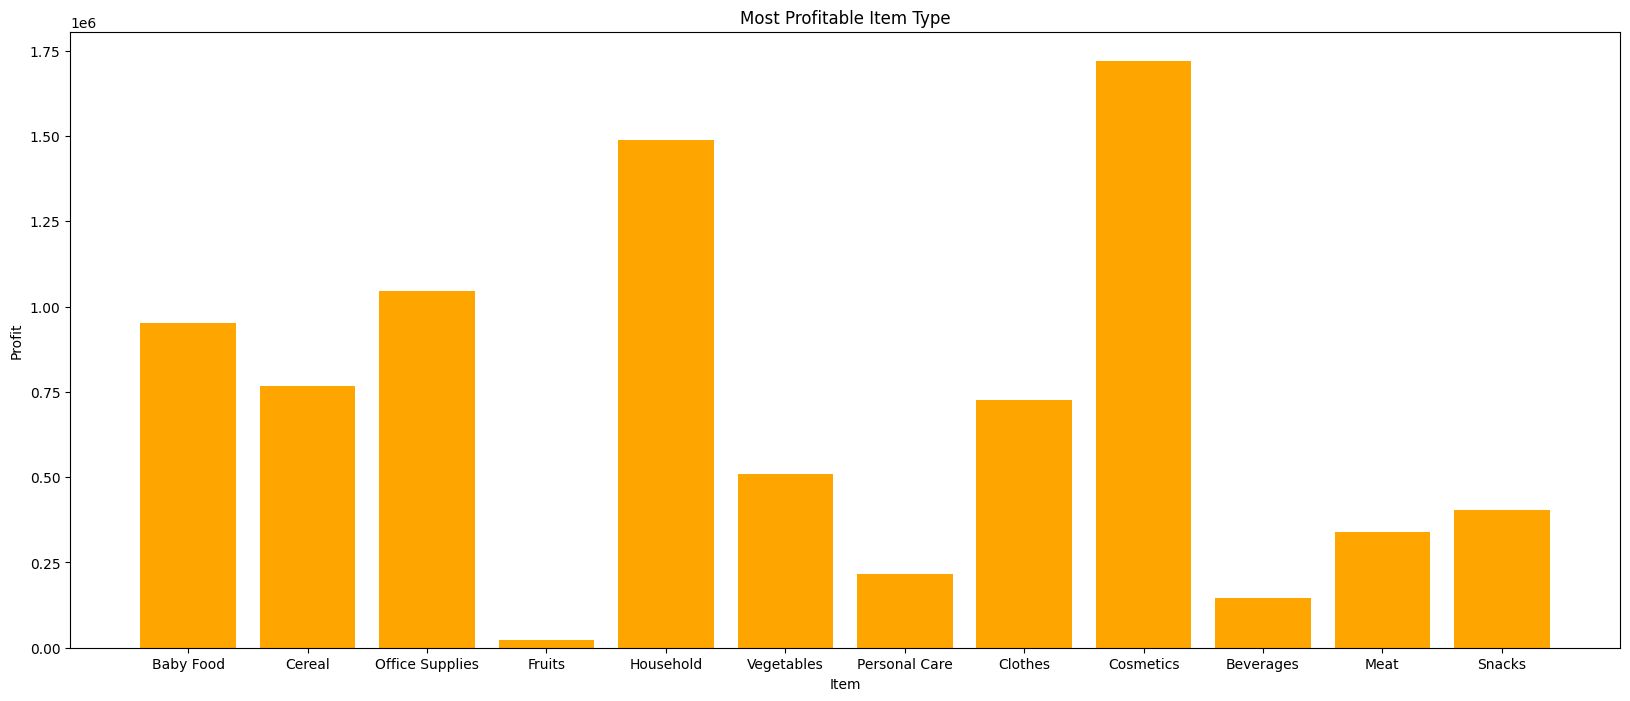

In [35]:
plt.figure(figsize=(20, 8))
bars = plt.bar(df['Item Type'], df['Total Profit'], color='orange')

plt.xlabel('Item')
plt.ylabel('Profit')
plt.title('Most Profitable Item Type')
plt.show()

**The Bar Chart above gives us an insight on the Items generating the most amout of Profits**

The Top 3 Items with the most amount of Profits are:
1. **Cosmetics** generated the most amount of Profits.
2. **Household Items** generated the second most amount of Profits.
3. **Office Supplies** stood third in terms of the Profits generated.

The Bottom 3 Items with the least amount of Profits are:
1. **Fruits** generated the least amount of Profits.
2. **Beverages** stood second in terms of the least amount of Profits.
3. **Personal Care** apparels generated the third least amount of Profits.

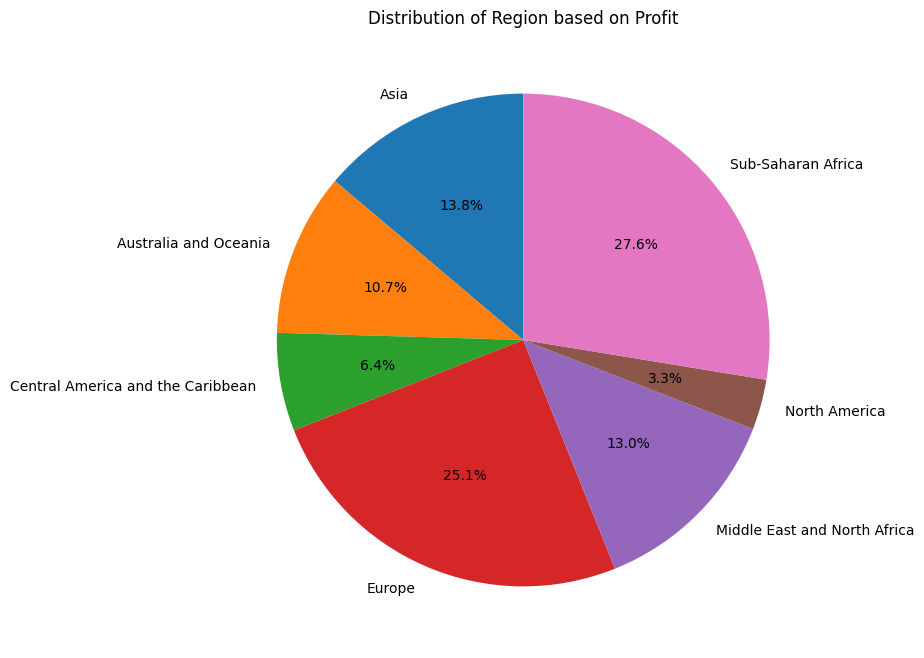

In [36]:
profit_by_region = df.groupby('Region')['Total Profit'].sum()
plt.figure(figsize=(20, 8))
plt.pie(profit_by_region, labels=profit_by_region.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Region based on Profit')
plt.show()

**The Pie-Chart above displays the Profits based on different Regions of the World**

1.   **Sub-Saharan Africa** generated the most amount of Profits with 27.6%.
2.   **Europe** stood second as it generated 25.1% of the Profits.
3.   **Asia** generated 13.8% of the Profits and stood Third.
4.   **Middle East and North Africa** generated 13.0% of Profits.
5.   **Australia and Oceania** generated 10.7% of the Profits.
6.   **Central America and the Carribean** generated 6.4% of the Profits.
7.   **North America** generated the least amount of Profits with just 3.3% of the Profits

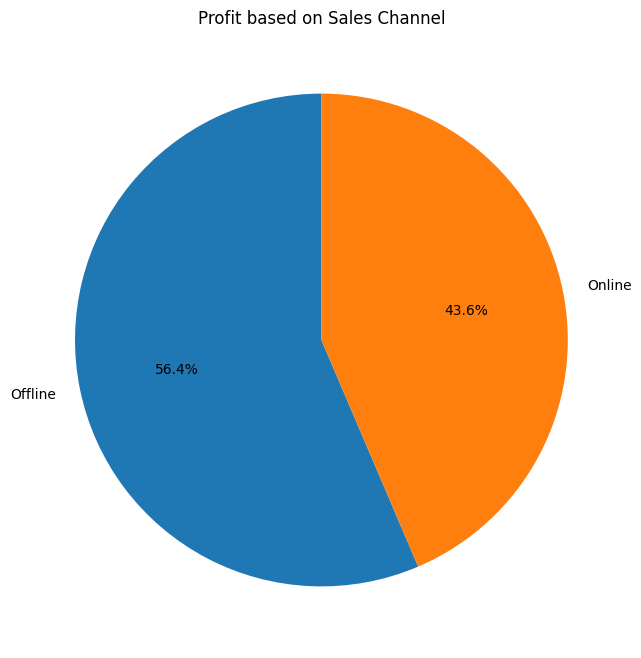

In [37]:
channel_profit = df.groupby('Sales Channel')['Total Profit'].sum()
plt.figure(figsize=(10, 8))
plt.pie(channel_profit, labels=channel_profit.index, autopct='%1.1f%%', startangle=90)
plt.title('Profit based on Sales Channel')
plt.show()

**The Pie-Chart gives us the distribution of the Sales Channel in terms of Profits**

As observed, we can see that **56.4%** of the Profits was generated by the **Offline Sales Channel** and **43.6%** of the Profits was generated by the **Online Sales Channel**


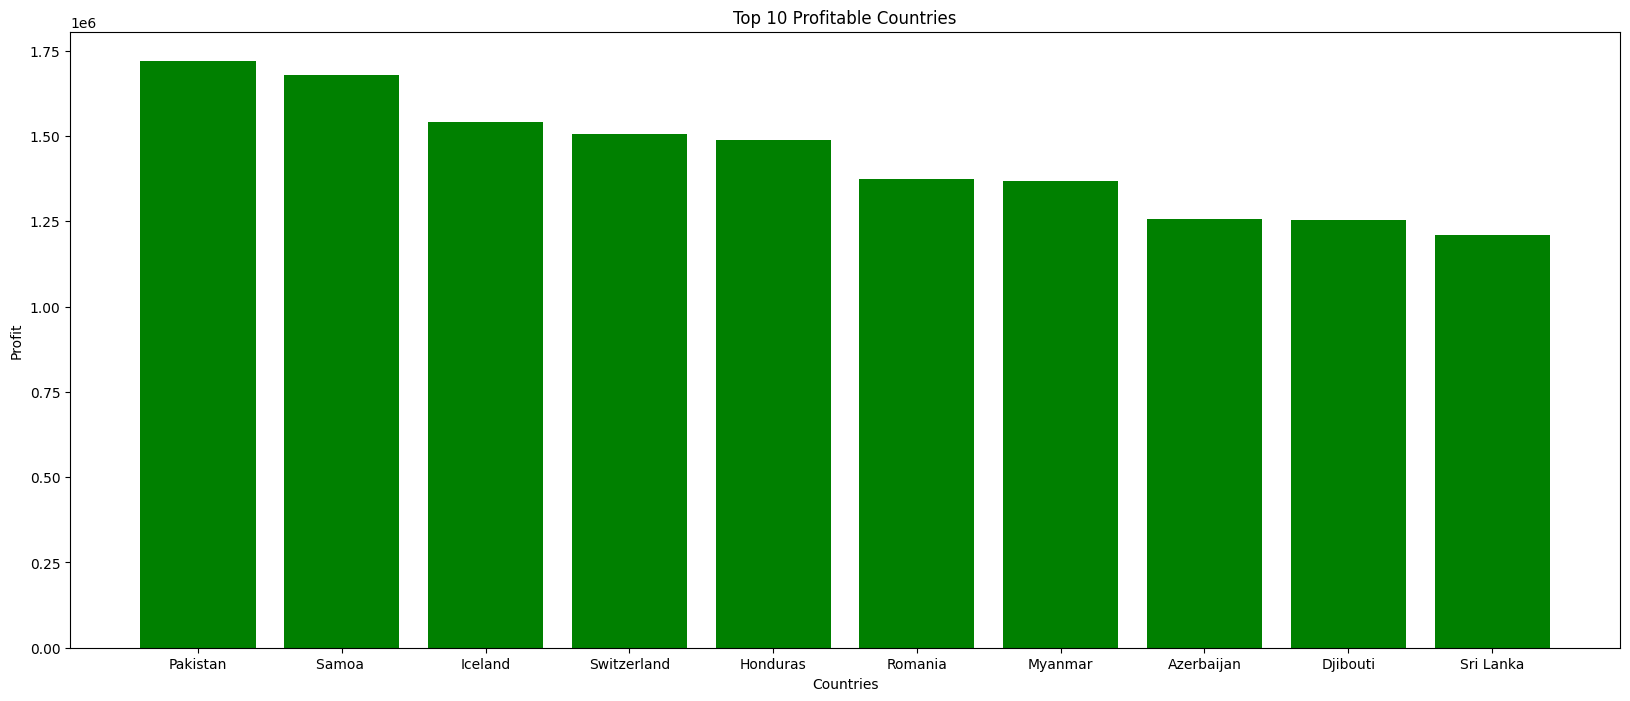

In [38]:
df_sorted = df.sort_values(by='Total Profit', ascending=False)

top10_profitable = df_sorted.head(10)

plt.figure(figsize=(20, 8))
bars = plt.bar(top10_profitable['Country'], top10_profitable['Total Profit'], color='green')

plt.xlabel('Countries')
plt.ylabel('Profit')
plt.title('Top 10 Profitable Countries')
plt.show()

**The Bar Chart gives us an insight on the countries with the top 10 most amount of Profits**

The Top 5 Countries with the most Profits are:

1.   Pakistan
2.   Samoa
3.   Iceland
4.   Switzerland
5.   Honduras



## **PROJECT BY ASTER NATHAN**